In [63]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Handeling the train data

In [64]:
df_old_train=pd.read_excel("Fasttext_Embeddings.xlsx")
df_old_train.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.063818,-0.002956,0.046252,0.025709,-0.039632,-0.027515,-0.019069,-0.017803,-0.019435,-0.010251,...,0.033231,-0.007925,-0.026086,-0.013389,0.026854,0.001910,0.018770,0.043188,0.013065,-0.008131
1,-0.021974,-0.015165,-0.005738,0.002587,0.017634,-0.007912,-0.029589,-0.000424,-0.000201,-0.016205,...,-0.004967,0.026013,-0.036620,-0.005342,0.021623,-0.017112,0.039968,0.042420,0.030354,-0.018815
2,0.021107,-0.019719,0.014171,0.005624,-0.006661,0.014543,-0.037427,-0.005945,0.029306,0.007444,...,0.008014,-0.023220,0.018026,-0.008823,-0.011469,-0.020614,0.043133,0.040183,0.023985,-0.017030
3,0.015203,-0.034075,-0.002269,0.004831,-0.033835,-0.021648,0.021952,0.016798,-0.013468,-0.022729,...,0.011612,-0.002233,0.008309,-0.036506,0.025897,-0.028291,0.015314,0.041089,0.031551,0.002842
4,0.014961,-0.002341,0.040177,0.025244,-0.000624,-0.025035,-0.014516,0.030175,-0.015999,0.013100,...,-0.050263,-0.017612,0.022691,0.034896,0.013537,0.008184,-0.020844,0.030162,0.007622,0.016819


In [65]:
df_new_train=pd.read_excel("Translated_Output_File.xlsx")
df_new_train.head(3)

,Golden summary,Golden Summary Translated,Domain,Class Label
0,"""The appellant, a cooperative society, filed a...","""అప్పీలెంట్ అనే సహకార సొసైటీ, రాజస్థాన్ హైకోర్...",Civil,0
1,"""The appellants were members of the East India...","""అప్పీలుదారులు ఈస్ట్ ఇండియా కాటన్ అసోసియేషన్ ల...",Civil,0
2,"""Petitioner Rashid Ahmed is running a wholesal...","""పిటిషనర్ రషీద్ అహ్మద్ ఉత్తర ప్రదేశ్ రాష్ట్రంల...",Civil,0


In [66]:
df_old_train.shape

(310, 300)

In [67]:
df_new_train.shape

(310, 4)

In [68]:
df_new_train.isnull().sum()

Golden summary               0
Golden Summary Translated    0
Domain                       0
Class Label                  0
dtype: int64

In [69]:
df_train=df_old_train

In [70]:
target=df_new_train["Class Label"]

In [71]:
target.shape

(310,)

In [72]:
df_train["label"]=target

### Fill the null values

In [73]:
null_values=df_train.isnull().sum().sum()
print(f"The null values present in the data : {null_values}")
## drop null values
df_train.dropna(subset=['label'], inplace=True)

The null values present in the data : 0


### Convert label into int

In [74]:
df_train["label"] = df_train["label"].astype('int64')

In [75]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,-0.063818,-0.002956,0.046252,0.025709,-0.039632,-0.027515,-0.019069,-0.017803,-0.019435,-0.010251,...,-0.007925,-0.026086,-0.013389,0.026854,0.001910,0.018770,0.043188,0.013065,-0.008131,0
1,-0.021974,-0.015165,-0.005738,0.002587,0.017634,-0.007912,-0.029589,-0.000424,-0.000201,-0.016205,...,0.026013,-0.036620,-0.005342,0.021623,-0.017112,0.039968,0.042420,0.030354,-0.018815,0
2,0.021107,-0.019719,0.014171,0.005624,-0.006661,0.014543,-0.037427,-0.005945,0.029306,0.007444,...,-0.023220,0.018026,-0.008823,-0.011469,-0.020614,0.043133,0.040183,0.023985,-0.017030,0
3,0.015203,-0.034075,-0.002269,0.004831,-0.033835,-0.021648,0.021952,0.016798,-0.013468,-0.022729,...,-0.002233,0.008309,-0.036506,0.025897,-0.028291,0.015314,0.041089,0.031551,0.002842,0
4,0.014961,-0.002341,0.040177,0.025244,-0.000624,-0.025035,-0.014516,0.030175,-0.015999,0.013100,...,-0.017612,0.022691,0.034896,0.013537,0.008184,-0.020844,0.030162,0.007622,0.016819,0


### Handleing test data

In [76]:
df_old_test=pd.read_excel("Fasttext_Embeddings.xlsx")
df_old_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.063818,-0.002956,0.046252,0.025709,-0.039632,-0.027515,-0.019069,-0.017803,-0.019435,-0.010251,...,0.033231,-0.007925,-0.026086,-0.013389,0.026854,0.001910,0.018770,0.043188,0.013065,-0.008131
1,-0.021974,-0.015165,-0.005738,0.002587,0.017634,-0.007912,-0.029589,-0.000424,-0.000201,-0.016205,...,-0.004967,0.026013,-0.036620,-0.005342,0.021623,-0.017112,0.039968,0.042420,0.030354,-0.018815
2,0.021107,-0.019719,0.014171,0.005624,-0.006661,0.014543,-0.037427,-0.005945,0.029306,0.007444,...,0.008014,-0.023220,0.018026,-0.008823,-0.011469,-0.020614,0.043133,0.040183,0.023985,-0.017030


In [77]:
df_new_test=pd.read_excel("Translated_Output_File.xlsx")
df_new_test.head(3)

,Golden summary,Golden Summary Translated,Domain,Class Label
0,"""The appellant, a cooperative society, filed a...","""అప్పీలెంట్ అనే సహకార సొసైటీ, రాజస్థాన్ హైకోర్...",Civil,0
1,"""The appellants were members of the East India...","""అప్పీలుదారులు ఈస్ట్ ఇండియా కాటన్ అసోసియేషన్ ల...",Civil,0
2,"""Petitioner Rashid Ahmed is running a wholesal...","""పిటిషనర్ రషీద్ అహ్మద్ ఉత్తర ప్రదేశ్ రాష్ట్రంల...",Civil,0


In [78]:
df_old_test.shape

(310, 300)

In [79]:
df_new_test.shape

(310, 4)

In [80]:
df_test=df_old_test

In [81]:
df_test["label"]=target

In [82]:
df_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,-0.063818,-0.002956,0.046252,0.025709,-0.039632,-0.027515,-0.019069,-0.017803,-0.019435,-0.010251,...,-0.007925,-0.026086,-0.013389,0.026854,0.001910,0.018770,0.043188,0.013065,-0.008131,0
1,-0.021974,-0.015165,-0.005738,0.002587,0.017634,-0.007912,-0.029589,-0.000424,-0.000201,-0.016205,...,0.026013,-0.036620,-0.005342,0.021623,-0.017112,0.039968,0.042420,0.030354,-0.018815,0
2,0.021107,-0.019719,0.014171,0.005624,-0.006661,0.014543,-0.037427,-0.005945,0.029306,0.007444,...,-0.023220,0.018026,-0.008823,-0.011469,-0.020614,0.043133,0.040183,0.023985,-0.017030,0


### Understanding about the dataframe

In [83]:
def information(df):
    # Finding the numbers of columns

    num_columns = len(df.columns)
    print("Number of columns:", num_columns)

    # Shape of data frame
    print(f"The shape of the data frame is : {df.shape}")

    # The number of Unique values in label
    unique_counts = df["label"].value_counts()
    print(f"Unique value counts in 'Label' :  {len(unique_counts)}")


information(df_train)


Number of columns: 301
The shape of the data frame is : (310, 301)
Unique value counts in 'Label' :  3


### Count of each label in dataframe

In [84]:
label_values = list(df_train['label'].unique())
label_counts = df_train['label'].value_counts()
print(label_counts)

label
0    170
1    111
2     29
Name: count, dtype: int64


#### Import all modules

In [85]:
# import all the modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

### Evaluation metrics for checking the accuracy

In [86]:
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds,average='macro')
    recall = recall_score(y_true,y_preds,average='macro')
    f1 = f1_score(y_true,y_preds,average='macro')
    metric_dict = { "accuracy"   : round(accuracy,2),
                    "precision"  : round(precision,2),
                    "recall"     : round(recall,2),
                    "f1 "        : round(f1,2)
                  }

    print(f"Acc        : {accuracy*100:.2f}%")
    print(f"Precision  : {precision*100:.2f}%")
    print(f"Recall     : {recall*100:.2f}%")
    print(f"F1_score   : {((2*precision*recall)/(precision+recall))*100:.2f}%")
    return metric_dict

In [87]:
def cross_fun(clf,x,y):
    cv_score=cross_val_score(clf,x,y,cv=5)
    print(f"The cross validation accuracy MEAN is : {np.mean(cv_score)*100:.2f}%")
    print(f"The cross validation accuracy STD  is : {np.std(cv_score)*100:.2f}")

#### Prepare the data for train

In [88]:
x = df_train.drop('label', axis=1)# Features
y  = df_train['label']  # Target  s

In [89]:
def model_training(df,clf):
    x = df.drop('label', axis=1)# Features
    y = df['label']  # Target

    # Splitting the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


    clf.fit(x_train, y_train)

    y_test_preds = clf.predict(x_test.values)
    y_train_preds= clf.predict(x_train.values)



    print(f"Report for train data")
    evaluate_preds(y_train,y_train_preds)
    print("  ")
    print("  ")
    print("  ")
    print(f"Report for test data")
    evaluate_preds(y_test,y_test_preds)

    print(" ")
    print(" ")
    print(f"N FOLD SCORE")
    cross_fun(clf,x,y)

### KNN model

In [90]:
model_training(df_train,KNeighborsClassifier(n_neighbors=5))

Report for train data
Acc        : 62.90%
Precision  : 41.88%
Recall     : 47.68%
F1_score   : 44.59%
  
  
  
Report for test data
Acc        : 47.58%
Precision  : 32.24%
Recall     : 34.59%
F1_score   : 33.37%
 
 
N FOLD SCORE
The cross validation accuracy MEAN is : nan%
The cross validation accuracy STD  is : nan


### Random Forest

In [91]:
model_training(df_train,RandomForestClassifier())

Report for train data
Acc        : 76.88%
Precision  : 87.05%
Recall     : 68.39%
F1_score   : 76.60%
  
  
  
Report for test data
Acc        : 61.29%
Precision  : 40.49%
Recall     : 37.57%
F1_score   : 38.98%
 
 
N FOLD SCORE
The cross validation accuracy MEAN is : 53.87%
The cross validation accuracy STD  is : 5.26


### Decision Trees

In [92]:
model_training(df_train,DecisionTreeClassifier(random_state=42))

Report for train data
Acc        : 76.88%
Precision  : 89.00%
Recall     : 67.95%
F1_score   : 77.06%
  
  
  
Report for test data
Acc        : 50.81%
Precision  : 31.11%
Recall     : 31.00%
F1_score   : 31.05%
 
 
N FOLD SCORE
The cross validation accuracy MEAN is : 48.06%
The cross validation accuracy STD  is : 3.87


### Multi Layer Perceptron

In [93]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, alpha=0.0001,
                    solver='adam', verbose=False, random_state=42, tol=0.0001)
model_training(df_train,mlp)

Report for train data
Acc        : 76.88%
Precision  : 86.04%
Recall     : 68.39%
F1_score   : 76.21%
  
  
  
Report for test data
Acc        : 53.23%
Precision  : 30.20%
Recall     : 32.69%
F1_score   : 31.39%
 
 
N FOLD SCORE
The cross validation accuracy MEAN is : 50.97%
The cross validation accuracy STD  is : 5.16


### SVM

In [94]:
svm = SVC(kernel='rbf', random_state=42)
model_training(df_train,svm)

Report for train data
Acc        : 62.90%
Precision  : 84.10%
Recall     : 49.87%
F1_score   : 62.61%
  
  
  
Report for test data
Acc        : 57.26%
Precision  : 27.78%
Recall     : 32.74%
F1_score   : 30.05%
 
 
N FOLD SCORE
The cross validation accuracy MEAN is : 52.58%
The cross validation accuracy STD  is : 4.03


### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_training(df_train,log_reg)

Report for train data
Acc        : 58.06%
Precision  : 49.27%
Recall     : 38.87%
F1_score   : 43.46%
  
  
  
Report for test data
Acc        : 55.65%
Precision  : 24.76%
Recall     : 31.83%
F1_score   : 27.85%
 
 
N FOLD SCORE
The cross validation accuracy MEAN is : 50.97%
The cross validation accuracy STD  is : 4.16


In [96]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,-0.063818,-0.002956,0.046252,0.025709,-0.039632,-0.027515,-0.019069,-0.017803,-0.019435,-0.010251,...,-0.007925,-0.026086,-0.013389,0.026854,0.001910,0.018770,0.043188,0.013065,-0.008131,0
1,-0.021974,-0.015165,-0.005738,0.002587,0.017634,-0.007912,-0.029589,-0.000424,-0.000201,-0.016205,...,0.026013,-0.036620,-0.005342,0.021623,-0.017112,0.039968,0.042420,0.030354,-0.018815,0
2,0.021107,-0.019719,0.014171,0.005624,-0.006661,0.014543,-0.037427,-0.005945,0.029306,0.007444,...,-0.023220,0.018026,-0.008823,-0.011469,-0.020614,0.043133,0.040183,0.023985,-0.017030,0
3,0.015203,-0.034075,-0.002269,0.004831,-0.033835,-0.021648,0.021952,0.016798,-0.013468,-0.022729,...,-0.002233,0.008309,-0.036506,0.025897,-0.028291,0.015314,0.041089,0.031551,0.002842,0
4,0.014961,-0.002341,0.040177,0.025244,-0.000624,-0.025035,-0.014516,0.030175,-0.015999,0.013100,...,-0.017612,0.022691,0.034896,0.013537,0.008184,-0.020844,0.030162,0.007622,0.016819,0


In [97]:
x = df_train.drop('label', axis=1)
y = df_train['label']

In [98]:
scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(x)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

### SMOTE

In [100]:
from imblearn.over_sampling import SMOTE
import pandas as pd
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_transformed, y)
resampled_df = pd.DataFrame(X_smote, columns=x.columns)
resampled_df['label'] = y_smote
print(resampled_df['label'].value_counts())
resampled_df

label
0    170
1    170
2    170
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,0.052499,0.586671,0.502850,0.840056,0.305785,0.376632,0.818967,0.218443,0.443780,0.172252,...,0.564299,0.347722,0.749196,0.580857,0.719027,0.827474,0.056172,0.659098,0.533333,0
1,0.269554,0.568153,0.331135,0.809361,0.400103,0.449786,0.792540,0.275808,0.548257,0.163952,...,0.634947,0.337908,0.765592,0.552422,0.651177,0.879919,0.055732,0.731068,0.493178,0
2,0.493023,0.561245,0.396892,0.813393,0.360089,0.533586,0.772849,0.257585,0.708530,0.196919,...,0.532458,0.388820,0.758499,0.372543,0.638686,0.887750,0.054449,0.704556,0.499886,0
3,0.462401,0.539471,0.342593,0.812340,0.315334,0.398527,0.922027,0.332657,0.476195,0.154858,...,0.576147,0.379767,0.702095,0.575658,0.611304,0.818923,0.054968,0.736053,0.574573,0
4,0.461144,0.587603,0.482785,0.839438,0.370032,0.385887,0.830406,0.376813,0.462446,0.204802,...,0.544132,0.393166,0.847573,0.508473,0.741407,0.729468,0.048703,0.636439,0.627101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,0.465196,0.568847,0.384996,0.811495,0.362877,0.519792,0.796747,0.262572,0.668072,0.194281,...,0.544743,0.384552,0.763068,0.388389,0.657374,0.860627,0.048593,0.679179,0.516153,2
506,0.122875,0.584534,0.376644,0.895929,0.452543,0.185870,0.875623,0.218340,0.450941,0.127805,...,0.389087,0.245371,0.603904,0.726853,0.655293,0.786986,0.048666,0.723289,0.613976,2
507,0.383538,0.591154,0.350088,0.805927,0.371060,0.479314,0.866876,0.277208,0.549348,0.186541,...,0.580796,0.372026,0.776475,0.434887,0.712215,0.781037,0.031408,0.604710,0.563891,2
508,0.122875,0.584534,0.376644,0.895929,0.452543,0.185870,0.875623,0.218340,0.450941,0.127805,...,0.389087,0.245371,0.603904,0.726853,0.655293,0.786986,0.048666,0.723289,0.613976,2


### KNN

In [101]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_test_preds = knn.predict(x_test)
y_train_preds=knn.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(knn,x,y)

Report for train data
Acc        : 70.05%
Precision  : 81.25%
Recall     : 56.72%
F1_score   : 66.80%
  
  
Report for test data
Acc        : 55.91%
Precision  : 34.79%
Recall     : 34.97%
F1_score   : 34.88%
 
N FOLD SCORE
The cross validation accuracy MEAN is : nan%
The cross validation accuracy STD  is : nan


### Random Forest

In [102]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_test_preds = model.predict(x_test)
y_train_preds= model.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(model,x,y)

Report for train data
Acc        : 77.42%
Precision  : 80.76%
Recall     : 69.77%
F1_score   : 74.87%
  
  
Report for test data
Acc        : 58.06%
Precision  : 49.12%
Recall     : 41.94%
F1_score   : 45.25%
 
N FOLD SCORE
The cross validation accuracy MEAN is : 53.87%
The cross validation accuracy STD  is : 4.63


### Decision Tree

In [103]:
des_trees = DecisionTreeClassifier(random_state=42)
des_trees.fit(x_train, y_train)
y_test_preds = des_trees.predict(x_test)
y_train_preds= des_trees.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(des_trees,x,y)

Report for train data
Acc        : 77.42%
Precision  : 80.76%
Recall     : 69.77%
F1_score   : 74.87%
  
  
Report for test data
Acc        : 54.84%
Precision  : 43.03%
Recall     : 41.67%
F1_score   : 42.34%
 
N FOLD SCORE
The cross validation accuracy MEAN is : 48.06%
The cross validation accuracy STD  is : 3.87


### MLP

In [104]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, alpha=0.0001,
                    solver='adam', verbose=False, random_state=42, tol=0.0001)
mlp.fit(x_train, y_train)
y_test_preds = mlp.predict(x_test)
y_train_preds= mlp.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(mlp,x,y)


Report for train data
Acc        : 53.92%
Precision  : 17.97%
Recall     : 33.33%
F1_score   : 23.35%
  
  
Report for test data
Acc        : 56.99%
Precision  : 19.00%
Recall     : 33.33%
F1_score   : 24.20%
 
N FOLD SCORE
The cross validation accuracy MEAN is : 50.97%
The cross validation accuracy STD  is : 5.16


### SVM

In [105]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(x_train, y_train)
y_test_preds = svm.predict(x_test)
y_train_preds= svm.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(svm,x,y)

Report for train data
Acc        : 54.38%
Precision  : 51.39%
Recall     : 33.77%
F1_score   : 40.76%
  
  
Report for test data
Acc        : 56.99%
Precision  : 19.00%
Recall     : 33.33%
F1_score   : 24.20%
 
N FOLD SCORE
The cross validation accuracy MEAN is : 52.58%
The cross validation accuracy STD  is : 4.03


### LogisticRegression

In [106]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(x_train, y_train)
y_test_preds =log_reg.predict(x_test)
y_train_preds=log_reg.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(log_reg,x,y)

Report for train data
Acc        : 70.51%
Precision  : 81.52%
Recall     : 55.90%
F1_score   : 66.32%
  
  
Report for test data
Acc        : 53.76%
Precision  : 32.07%
Recall     : 33.71%
F1_score   : 32.87%
 
N FOLD SCORE
The cross validation accuracy MEAN is : 50.97%
The cross validation accuracy STD  is : 4.16


In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

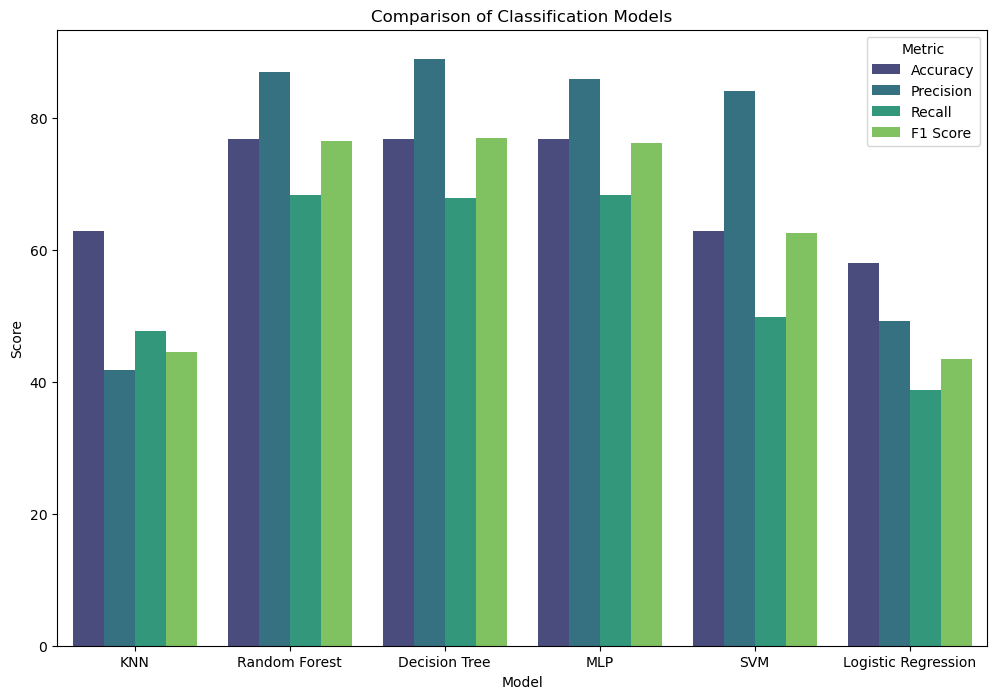

In [123]:
metrics = {'Model': ['KNN','Random Forest','Decision Tree','MLP','SVM','Logistic Regression'], 
           'Accuracy': [62.90,76.88,76.88,76.88,62.90,58.06], 
           'Precision': [41.88,87.05,89.00,86.04,84.10,49.27], 
           'Recall': [47.68,68.39,67.95,68.39,49.87,38.87], 
           'F1 Score': [44.59,76.60,77.06,76.21,62.61,43.46]}


df_metrics = pd.DataFrame(metrics)

# Melt the DataFrame for Seaborn plotting
df_melted = pd.melt(df_metrics, id_vars='Model', var_name='Metric', value_name='Score')

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

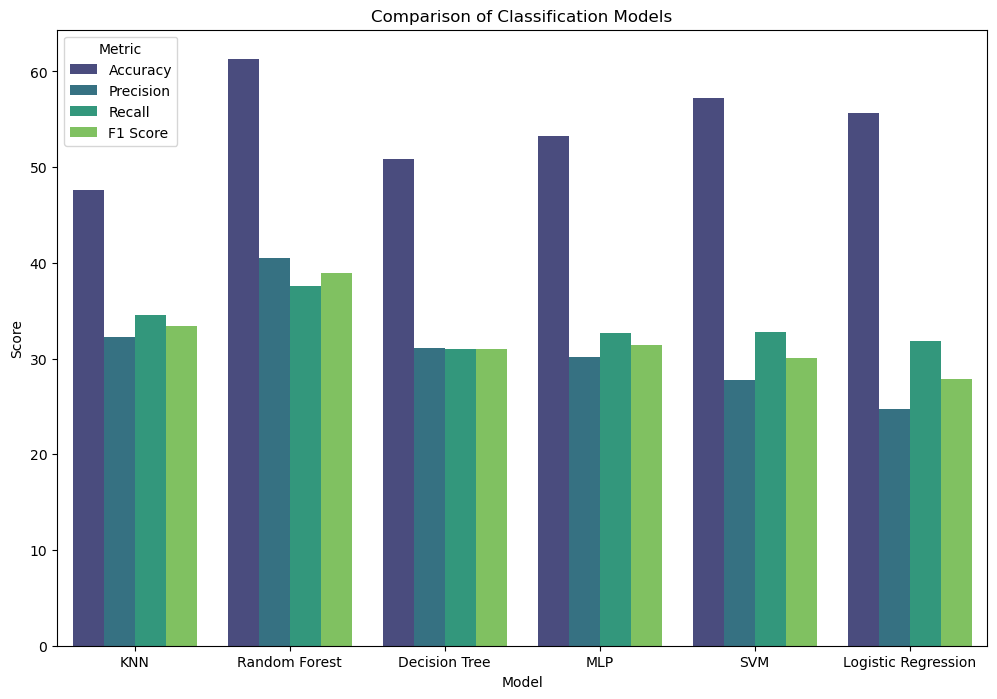

In [126]:
metrics = {'Model': ['KNN','Random Forest','Decision Tree','MLP','SVM','Logistic Regression'], 
           'Accuracy': [47.58,61.29,50.81,53.23,57.26,55.65], 
           'Precision': [32.24,40.49,31.11,30.20,27.78,24.75], 
           'Recall': [34.59,37.57,31.00,32.69,32.74,31.83], 
           'F1 Score': [33.37,38.98,31.05,31.39,30.05,27.85]}


df_metrics = pd.DataFrame(metrics)

# Melt the DataFrame for Seaborn plotting
df_melted = pd.melt(df_metrics, id_vars='Model', var_name='Metric', value_name='Score')

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

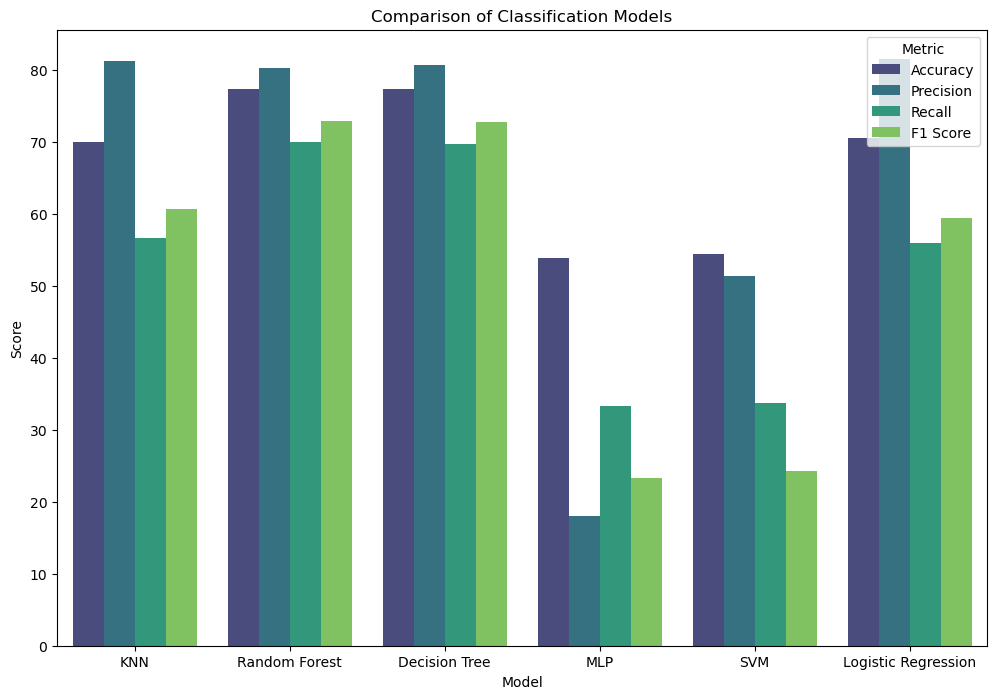

In [110]:
metrics = {'Model': ['KNN','Random Forest','Decision Tree','MLP','SVM','Logistic Regression'], 
           'Accuracy': [70.05,77.42,77.42,53.92,54.38,70.51], 
           'Precision': [81.25,80.76,80.76,17.97,51.39,81.52], 
           'Recall': [56.72,69.77,69.77,33.33,33.77,55.90], 
           'F1 Score': [66.80,74.87,74.87,23.35,40.76,66.32]}


df_metrics = pd.DataFrame(metrics)

# Melt the DataFrame for Seaborn plotting
df_melted = pd.melt(df_metrics, id_vars='Model', var_name='Metric', value_name='Score')

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

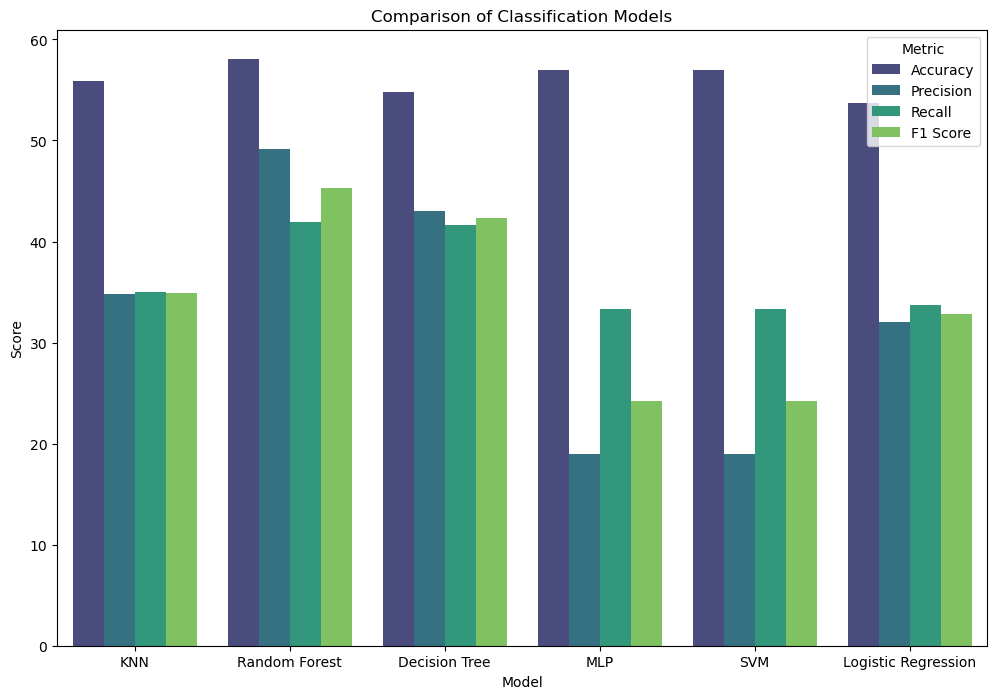

In [125]:
metrics = {'Model': ['KNN','Random Forest','Decision Tree','MLP','SVM','Logistic Regression'], 
           'Accuracy': [55.91,58.06,54.84,56.99,56.99,53.76], 
           'Precision': [34.79,49.12,43.03,19.00,19.00,32.07], 
           'Recall': [34.97,41.94,41.67,33.33,33.33,33.71], 
           'F1 Score': [34.88,45.25,42.34,24.20,24.20,32.87]}


df_metrics = pd.DataFrame(metrics)

# Melt the DataFrame for Seaborn plotting
df_melted = pd.melt(df_metrics, id_vars='Model', var_name='Metric', value_name='Score')

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

In [112]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load your balanced dataset after applying SMOTE # Replace with your actual file path

# Separate features and labels
X = resampled_df.drop('label', axis=1)
y = resampled_df['label']

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
    Feature  Importance
159     159    0.017061
292     292    0.016097
161     161    0.013336
145     145    0.012546
246     246    0.012295
..      ...         ...
98       98    0.000630
112     112    0.000625
144     144    0.000576
218     218    0.000447
88       88    0.000409

[300 rows x 2 columns]


In [113]:
from sklearn.feature_selection import RFE

x = resampled_df.drop(columns=['label'])
y = resampled_df['label']

    # Initialize the decision tree classifier
clf = DecisionTreeClassifier()

num_features_to_select = 200  # You can change this number as needed
rfe = RFE(estimator=clf, n_features_to_select=num_features_to_select)

    # Fit RFE to the data
rfe.fit(x, y)

    # Get the selected features
selected_features = x.columns[rfe.support_]

    # Filter the dataset to keep only the selected features and the target variable
selected_data = resampled_df[selected_features.union(['label'])]
print(selected_data)


           63        64        65        66        67        68        69  \
0    0.524807  0.348607  0.482424  0.199918  0.235202  0.732831  0.721013   
1    0.448055  0.423624  0.453909  0.115067  0.325656  0.713181  0.643961   
2    0.502495  0.379471  0.678598  0.118574  0.320137  0.733700  0.803604   
3    0.422459  0.288331  0.557511  0.142942  0.467059  0.728805  0.642421   
4    0.346123  0.292871  0.381674  0.141687  0.514129  0.783124  0.717838   
..        ...       ...       ...       ...       ...       ...       ...   
505  0.472546  0.354160  0.643303  0.119562  0.321462  0.739441  0.781067   
506  0.219578  0.362557  0.567782  0.329278  0.156197  0.796945  0.939808   
507  0.384662  0.279887  0.539734  0.122461  0.325350  0.756290  0.714932   
508  0.219578  0.362557  0.567782  0.329278  0.156197  0.796945  0.939808   
509  0.431878  0.305991  0.442221  0.116037  0.384205  0.717608  0.630196   

           70        71        72  ...       290       291       292  \
0  

In [114]:
x = selected_data.drop('label', axis=1)# Features
y  = selected_data['label']  # Target  s

### knn

In [115]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_test_preds = knn.predict(x_test)
y_train_preds=knn.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(knn,x,y)

Report for train data
Acc        : 70.05%
Precision  : 81.25%
Recall     : 56.72%
F1_score   : 66.80%
  
  
Report for test data
Acc        : 55.91%
Precision  : 34.79%
Recall     : 34.97%
F1_score   : 34.88%
 
N FOLD SCORE
The cross validation accuracy MEAN is : nan%
The cross validation accuracy STD  is : nan


### Random Forest

In [116]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_test_preds = model.predict(x_test)
y_train_preds= model.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(model,x,y)

Report for train data
Acc        : 77.42%
Precision  : 80.29%
Recall     : 69.93%
F1_score   : 74.75%
  
  
Report for test data
Acc        : 56.99%
Precision  : 47.44%
Recall     : 41.31%
F1_score   : 44.16%
 
N FOLD SCORE
The cross validation accuracy MEAN is : 64.90%
The cross validation accuracy STD  is : 3.74


### Decision Tree

In [117]:
des_trees = DecisionTreeClassifier(random_state=42)
des_trees.fit(x_train, y_train)
y_test_preds = des_trees.predict(x_test)
y_train_preds= des_trees.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(des_trees,x,y)

Report for train data
Acc        : 77.42%
Precision  : 80.76%
Recall     : 69.77%
F1_score   : 74.87%
  
  
Report for test data
Acc        : 54.84%
Precision  : 43.03%
Recall     : 41.67%
F1_score   : 42.34%
 
N FOLD SCORE
The cross validation accuracy MEAN is : 59.41%
The cross validation accuracy STD  is : 4.87


### MLP

In [118]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, alpha=0.0001,
                    solver='adam', verbose=False, random_state=42, tol=0.0001)
mlp.fit(x_train, y_train)
y_test_preds = mlp.predict(x_test)
y_train_preds= mlp.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(mlp,x,y)


Report for train data
Acc        : 53.92%
Precision  : 17.97%
Recall     : 33.33%
F1_score   : 23.35%
  
  
Report for test data
Acc        : 56.99%
Precision  : 19.00%
Recall     : 33.33%
F1_score   : 24.20%
 
N FOLD SCORE
The cross validation accuracy MEAN is : 36.08%
The cross validation accuracy STD  is : 5.66


### SVM

In [119]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(x_train, y_train)
y_test_preds = svm.predict(x_test)
y_train_preds= svm.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(svm,x,y)

Report for train data
Acc        : 54.38%
Precision  : 51.39%
Recall     : 33.77%
F1_score   : 40.76%
  
  
Report for test data
Acc        : 56.99%
Precision  : 19.00%
Recall     : 33.33%
F1_score   : 24.20%
 
N FOLD SCORE
The cross validation accuracy MEAN is : 51.76%
The cross validation accuracy STD  is : 3.25


### Logistic Regression

In [120]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(x_train, y_train)
y_test_preds =log_reg.predict(x_test)
y_train_preds=log_reg.predict(x_train)
print(f"Report for train data")
evaluate_preds(y_train,y_train_preds)
print("  ")
print("  ")
print(f"Report for test data")
evaluate_preds(y_test,y_test_preds)
print(" ")
print(f"N FOLD SCORE")
cross_fun(log_reg,x,y)

Report for train data
Acc        : 70.51%
Precision  : 81.52%
Recall     : 55.90%
F1_score   : 66.32%
  
  
Report for test data
Acc        : 53.76%
Precision  : 32.07%
Recall     : 33.71%
F1_score   : 32.87%
 
N FOLD SCORE
The cross validation accuracy MEAN is : 60.00%
The cross validation accuracy STD  is : 4.74


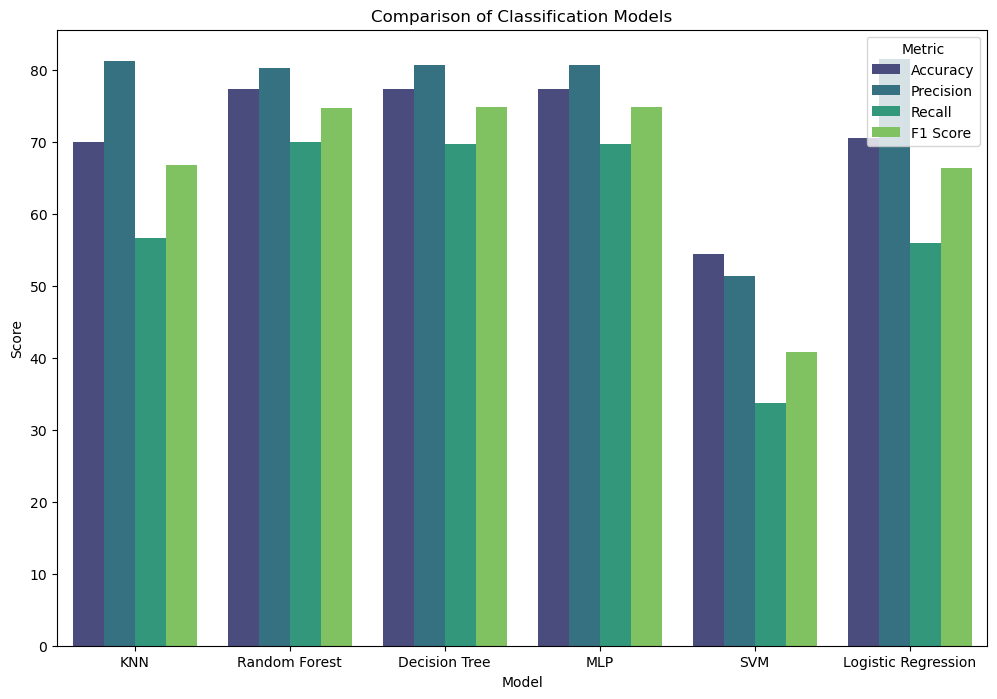

In [121]:
metrics = {'Model': ['KNN','Random Forest','Decision Tree','MLP','SVM','Logistic Regression'], 
           'Accuracy': [70.05,77.42,77.42,77.42,54.38,70.51], 
           'Precision': [81.25, 80.29,80.76,80.76,51.39,81.52], 
           'Recall': [56.72,69.93,69.77,69.77,33.77,55.90], 
           'F1 Score': [ 66.80,74.75,74.87,74.87,40.76,66.32]}


df_metrics = pd.DataFrame(metrics)

# Melt the DataFrame for Seaborn plotting
df_melted = pd.melt(df_metrics, id_vars='Model', var_name='Metric', value_name='Score')

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

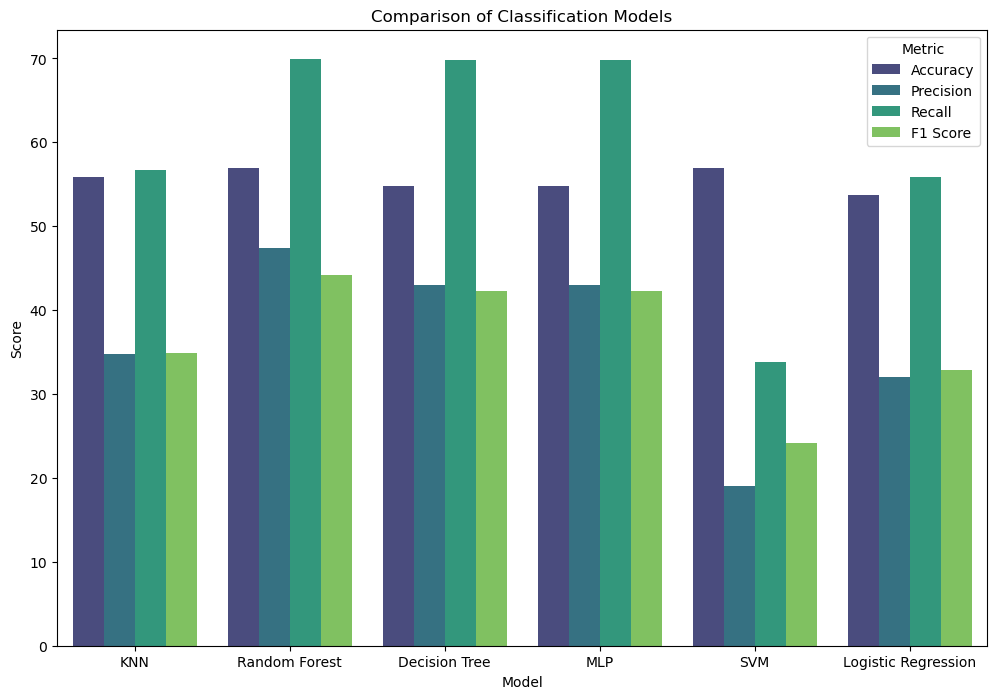

In [122]:
metrics = {'Model': ['KNN','Random Forest','Decision Tree','MLP','SVM','Logistic Regression'], 
           'Accuracy': [55.91,56.99,54.84,54.84,56.99,53.76], 
           'Precision': [34.79,47.44,43.03,43.03,19.00,32.07], 
           'Recall': [56.72,69.93,69.77,69.77,33.77,55.90], 
           'F1 Score': [34.88,44.16,42.34,42.34,24.20,32.87]}


df_metrics = pd.DataFrame(metrics)

# Melt the DataFrame for Seaborn plotting
df_melted = pd.melt(df_metrics, id_vars='Model', var_name='Metric', value_name='Score')

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()